In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.optimize import minimize

In [2]:
Tech_m = pd.read_csv('TECHM.NS.CSV')
Aurobindo = pd.read_csv('AUROPHARMA.NS.CSV')
TATA_Cons = pd.read_csv('TATACONSUM.NS.CSV')
Havells = pd.read_csv('Havells.NS.CSV')

In [3]:
assets = ['Tech_m', 'Aurobindo', 'TATA_Cons', 'Havells']

In [4]:
def set_datetime(dataframe):
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataframe.set_index('Date', inplace = True)

In [5]:
set_datetime(Tech_m)
set_datetime(Aurobindo)
set_datetime(TATA_Cons)
set_datetime(Havells)

In [6]:
data = pd.concat([Tech_m, Aurobindo, TATA_Cons, Havells], axis=1, keys = assets)

In [7]:
data

Tech_m                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2021-08-09  1290.400024  1306.800049  1266.000000  1287.449951  1168.971069   
2021-08-10  1288.000000  1329.699951  1282.400024  1323.050049  1201.295044   
2021-08-11  1323.050049  1326.750000  1298.349976  1323.599976  1201.794312   
2021-08-12  1323.000000  1394.800049  1317.750000  1386.550049  1258.951294   
2021-08-13  1380.099976  1390.000000  1365.900024  1383.150024  1255.864136   
...                 ...          ...          ...          ...          ...   
2024-08-05  1470.000000  1484.250000  1426.750000  1456.349976  1456.349976   
2024-08-06  1465.500000  1503.000000  1465.500000  1483.400024  1483.400024   
2024-08-07  1500.800049  1515.250000  1471.000000  1473.650024  1473.650024   
2024-08-08  1470.000000  1488.150024  1462.000000  1466.449951  1466.449951   
2024-08-09  1484.949951  1509.250000  1480.550049  1506.699951  1506.699951   

                       Aurobindo                                         ...  \
             Volume         Open         High          Low        Close  ...   
Date                                                                     ...   
2021-08-09  6585101   900.000000   902.950012   881.200012   887.700012  ...   
2021-08-10  6314469   890.000000   898.799988   871.299988   879.500000  ...   
2021-08-11  3430349   883.000000   883.799988   850.900024   856.500000  ...   
2021-08-12  8613315   862.000000   864.400024   822.099976   826.200012  ...   
2021-08-13  4760344   806.000000   822.000000   754.000000   761.299988  ...   
...             ...          ...          ...          ...          ...  ...   
2024-08-05  2186582  1428.349976  1442.000000  1408.400024  1421.250000  ...   
2024-08-06  1665788  1421.900024  1439.449951  1395.000000  1401.599976  ...   
2024-08-07  3002937  1416.599976  1472.099976  1414.250000  1465.150024  ...   
2024-08-08  2333194  1470.000000  1487.949951  1448.000000  1479.300049  ...   
2024-08-09  1520978  1480.400024  1488.300049  1431.050049  1449.699951  ...   

              TATA_Cons                                         Havells  \
                    Low        Close    Adj Close   Volume         Open   
Date                                                                      
2021-08-09   763.000000   764.849976   745.515320  1661739  1247.000000   
2021-08-10   761.049988   771.900024   752.387207  1429806  1245.900024   
2021-08-11   752.000000   765.000000   745.661621  1391781  1227.000000   
2021-08-12   763.000000   774.250000   754.677795   880420  1254.000000   
2021-08-13   774.299988   807.450012   787.038574  7956492  1230.000000   
...                 ...          ...          ...      ...          ...   
2024-08-05  1151.000000  1199.400024  1199.400024  3718458  1765.099976   
2024-08-06  1182.849976  1185.599976  1185.599976  1304014  1783.000000   
2024-08-07  1182.550049  1199.599976  1199.599976   759323  1805.000000   
2024-08-08  1174.000000  1178.300049  1178.300049  1298997  1825.000000   
2024-08-09  1180.000000  1186.150024  1186.150024   489665  1803.000000   

                                                                         
                   High          Low        Close    Adj Close   Volume  
Date                                                                     
2021-08-09  1254.349976  1230.550049  1235.500000  1213.562500  1438802  
2021-08-10  1254.699951  1218.599976  1223.849976  1202.119385  1823117  
2021-08-11  1243.250000  1196.849976  1236.750000  1214.790283  1973876  
2021-08-12  1255.599976  1226.050049  1231.900024  1210.026611  2264764  
2021-08-13  1257.150024  1225.400024  1242.150024  1220.094482  1861705  
...                 ...          ...          ...          ...      ...  
2024-08-05  1806.199951  1765.099976  1784.300049  1784.300049   970438 

In [8]:
data.columns.names = ['Company', 'Info']

In [14]:
returns = pd.DataFrame()
for stock in assets: 
    returns[stock+' Returns'] = data[stock]['Adj Close'].pct_change()

In [18]:
returns.head()

,Tech_m Returns,Aurobindo Returns,TATA_Cons Returns,Havells Returns
Date,,,,
2021-08-09,NaN,NaN,NaN,NaN
2021-08-10,0.027652,-0.009238,0.009218,-0.009429
2021-08-11,0.000416,-0.026151,-0.008939,0.010540
2021-08-12,0.047560,-0.035377,0.012092,-0.003921
2021-08-13,-0.002452,-0.078552,0.042880,0.008320


In [19]:
(returns.mean())*250

Tech_m Returns       0.124073
Aurobindo Returns    0.222354
TATA_Cons Returns    0.184022
Havells Returns      0.166559
dtype: float64

In [20]:
returns.cov()*250

,Tech_m Returns,Aurobindo Returns,TATA_Cons Returns,Havells Returns
Tech_m Returns,0.077065,0.019303,0.018579,0.019210
Aurobindo Returns,0.019303,0.096203,0.015046,0.015778
TATA_Cons Returns,0.018579,0.015046,0.054685,0.017635
Havells Returns,0.019210,0.015778,0.017635,0.067141


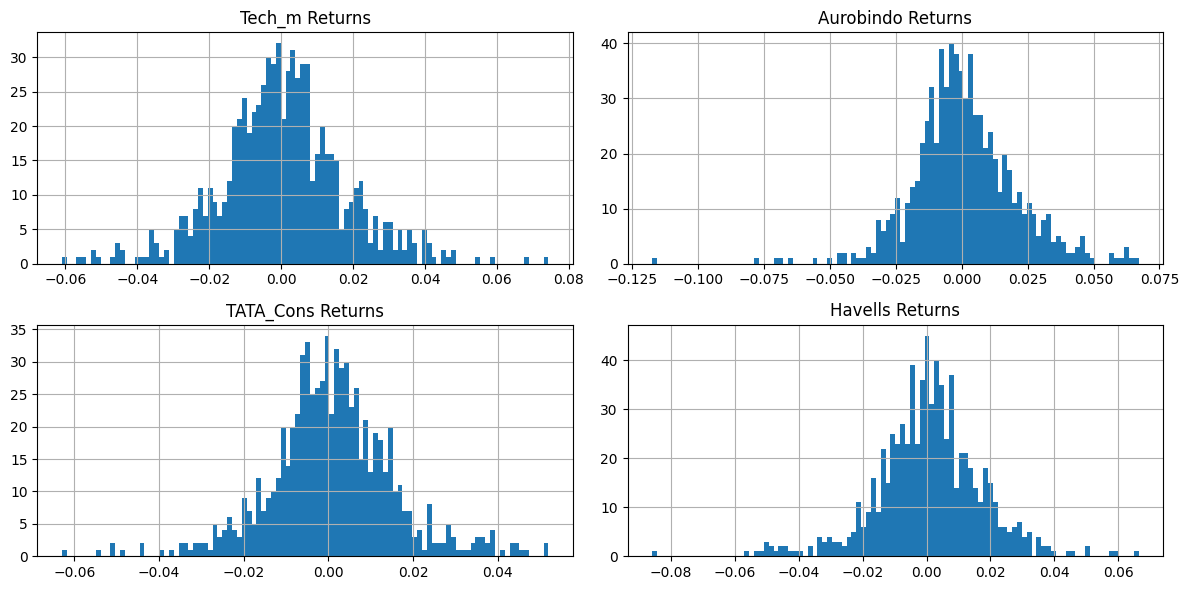

In [21]:
returns.hist(figsize=(12,6), bins=100)
plt.tight_layout()

#### Monte Carlo simulation

In [47]:
#single run
np.random.seed(101)
print(assets)
weights = np.array(np.random.random(4))
print('Random Weights')
print(weights)
print('Rebalanced Weights')
weights = weights/np.sum(weights)
print(weights)
print('Portfolio Return')
port_ret = np.sum(returns.mean()*250*weights)
print(port_ret)
print('Expected Volatility')
port_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*250, weights)))
print(port_vol)
print('Sharpe Ratio')
SR = (port_ret - 0.026)/port_vol
print(SR)


['Tech_m', 'Aurobindo', 'TATA_Cons', 'Havells']
Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalanced Weights
[0.40122278 0.44338777 0.02212343 0.13326603]
Portfolio Return
0.17463819132524255
Expected Volatility
0.2098895724461671
Sharpe Ratio
0.7081733008121001


In [48]:
num_ports = 5000
all_weights = np.zeros((num_ports, len(assets)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for i in range(num_ports):
    # Weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    all_weights[i,:] = weights
    # Expected return
    ret_arr[i] = np.sum(returns.mean()*250*weights)
    # Expected Volatility
    vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*250, weights)))
    # Sharpe ratio
    sharpe_arr[i] = (ret_arr[i] - 0.026)/vol_arr[i]


In [49]:
float(sharpe_arr.max())

0.8919475248862985

In [50]:
int(sharpe_arr.argmax())

1813

In [52]:
all_weights[4093,:]

array([0.18658982, 0.00674409, 0.59951324, 0.20715285])

In [53]:
max_sharpe_idx = sharpe_arr.argmax()
sharpe_max_vol = vol_arr[max_sharpe_idx]
sharpe_max_ret = ret_arr[max_sharpe_idx]

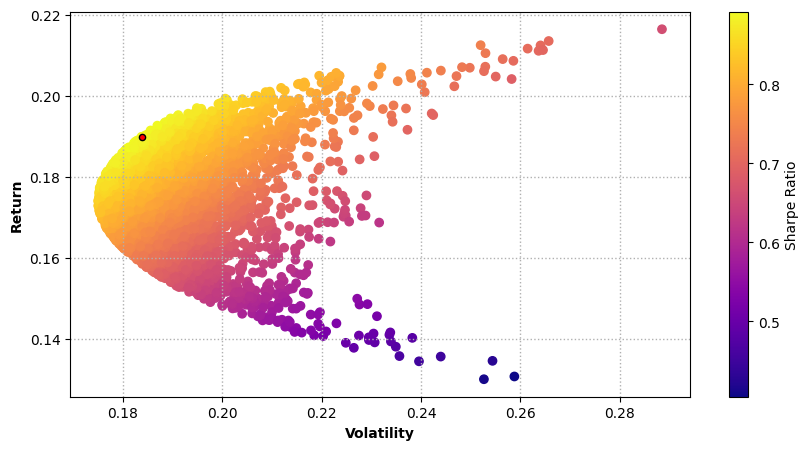

In [54]:
plt.figure(figsize = (10,5))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility', fontweight='bold')
plt.ylabel('Return', fontweight='bold')

plt.scatter(sharpe_max_vol, sharpe_max_ret, c='red', s=20, edgecolors='black')
plt.grid(True, ls=':', lw=1)


#### Optimize with minimize

In [55]:
def ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sr = (ret - 0.026)/vol
    return np.array([ret, vol, sr])

In [37]:
#help(minimize)

In [56]:
def sharpe_neg(weights):
    return ret_vol_sr(weights)[2] * -1

In [59]:
def sum_check(weights):
    return np.sum(weights) - 1

In [60]:
cons = ({'type':'eq','fun': sum_check})

In [61]:
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [62]:
init_guess = [0.25,0.25,0.25,0.25]

In [63]:
opt_results = minimize(sharpe_neg, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

In [64]:
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.8969502366176922
       x: [ 2.239e-02  3.107e-01  4.257e-01  2.412e-01]
     nit: 5
     jac: [-1.406e-01 -1.405e-01 -1.407e-01 -1.404e-01]
    nfev: 25
    njev: 5

In [65]:
opt_results.x

array([0.02239312, 0.3107207 , 0.42569927, 0.24118692])

In [67]:
ret_vol_sr(opt_results.x)

array([0.1919015 , 0.18496177, 0.89695024])